# On codera la lecture d'ARN

In [41]:
import plotly.express as px
import random
import numpy as np
import itertools
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
DEBUT_LECTURE = "ATG"
STOPS = ["TAA", "TAG", "TGA"]

acide_amine = {
    "TTT" : "Phe",
    "TTC" : "Phe",

    "TTA" : "Leu",
    "TTG" : "Leu",
    "CTT" : "Leu",
    "CTC" : "Leu",
    "CTA" : "Leu",
    "CTG" : "Leu",

    "ATT" : "Ile",
    "ATC" : "Ile",
    "ATA" : "Ile",

    "ATG" : "Met",

    "GTT" : "Val",
    "GTC" : "Val",
    "GTA" : "Val",
    "GTG" : "Val",

    "TCT" : "Ser",
    "TCC" : "Ser",
    "TCA" : "Ser",
    "TCG" : "Ser",

    "CCT" : "Pro",
    "CCC" : "Pro",
    "CCG" : "Pro",
    "CCA" : "Pro",

    "ACT" : "Thr",
    "ACA" : "Thr",
    "ACG" : "Thr",
    "ACC" : "Thr",

    "GCT" : "Ala",
    "GCA" : "Ala",
    "GCC" : "Ala",
    "GCG" : "Ala",

    "TAT" : "Tyr",
    "TAC" : "Tyr",

    "CAT" : "His",
    "CAC" : "His",

    "CAA" : "Gln",
    "CAG" : "Gln",

    "AAT" : "Asn",
    "AAC" : "Asn",

    "AAA" : "Lys",
    "AAG" : "Lys",

    "GAT" : "Asp",
    "GAC" : "Asp",

    "GAA" : "Glu",
    "GAG" : "Glu",

    "TGT" : "Cys",
    "TGC" : "Cys",

    "TGG" : "Trp",

    "CGT" : "Arg",
    "CGA" : "Arg",
    "CGC" : "Arg",
    "CGG" : "Arg",
    "AGA" : "Arg",
    "AGG" : "Arg",

    "AGT" : "Ser",
    "AGC" : "Ser",

    "GGT" : "Gly",
    "GGC" : "Gly",
    "GGA" : "Gly",
    "GGG" : "Gly"

}


In [4]:
# Trouver le début de la séquence
def find_start(arn):
    if arn[0:3] == DEBUT_LECTURE:
        return arn[3:]
    return find_start(arn[1:])

# Supprimer les lettres à la fin de l'ARN qui ne servent pas au calcul
def delete_end(arn):
    if arn == "":
        return ""
    if arn[0:3] in STOPS:
        return ""
    return arn[0:3] + delete_end(arn[3:])

# ça retourne juste la séquence codante
def get_coding_sequence(arn):
    arn = find_start(arn)
    return delete_end(arn)


# Lire la séquence après avoir enlevé les éléments qu'on lit pas
def read_sequence(arn):
    if len(arn) <= 2 or arn[0:3] in STOPS:
        return ""
    return (acide_amine[arn[0:3]] + "-" + read_sequence(arn[3:]))

def compare_two_sequences(arn1, arn2):
    element1 = read_sequence(arn1)
    element2 = read_sequence(arn2)

    element1 = element1.split("-")
    element2 = element2.split("-")

    min_length = min(len(element1), len(element2))
    equal = 0

    for i in range(0, min_length):
        if element1[i] == element2[i]:
            equal = equal + 1

    return equal


In [5]:
# On lit notre ARN
def read_arn(arn):
    return read_sequence(find_start(arn))

In [17]:
def generate_letter():
    return random.choice(["A", "T", "G", "C"])

def generate_sequence(length=-1):
    if length == -1:
        length = random.choice(range(20, 30))
    s = ""
    for i in range(0, length):
        s = s+generate_letter()
    return s

In [7]:
def changement(arn, PROB_M=5, PROB_D=5, PROB_A=5):
    p = random.choice(range(0, 100))
    if p < PROB_A:
        arn = arn + generate_letter()

    elif p < PROB_A + PROB_M:
        arn = generate_letter()

    elif p < PROB_A + PROB_M + PROB_D:
        arn = ""

    return arn

In [8]:
def sequence_changement(arn, proba_mut, proba_delete, proba_addition):
    t = ""
    for c in arn:
        t += changement(c, proba_mut, proba_delete, proba_addition)
    return t

In [9]:
def comparer_deux_chaines_ADN(ch1, ch2):
    ch_max = ""
    ch_min = ""
    if len(ch1) < len(ch2):
        ch_max = ch2
        ch_min = ch1
    else:
        ch_max = ch1
        ch_min = ch2

    n = len(ch_max) - len(ch_min)
    max_output = 0
    for k in range(0, n+1):
        max_output = max(max_output, int(np.sum([np.char.equal(ch_min, ch_max[k:k+len(ch_min)]) == True])))

    return max_output



In [10]:
CONST_POPULATION = 100
ADN = "ATGTTAGAAATTTCATGGTGCCTTA"

def meilleur_personne(generated_adn, proba_mut=5, proba_delete=5, proba_addition=5):
    result =  []
    g_adn = generated_adn
    print("ADN généré au départ :", generated_adn)
    find = False
    loop = 0
    while not find:
        pop_sequences = [""]*CONST_POPULATION
        occurences = [None]*CONST_POPULATION
        for i in range(0, CONST_POPULATION):
            pop_sequences[i] = sequence_changement(generated_adn, proba_mut, proba_delete, proba_addition)
            occurences[i] = compare_two_sequences(ADN, pop_sequences[i])
        max_index = occurences.index(max(occurences))
        result.append(pop_sequences[max_index])
        generated_adn = pop_sequences[max_index]

        if read_sequence(ADN) == read_sequence(generated_adn):
            find = True
        loop = loop + 1
        if loop > 300:
            find = True

    return g_adn, result, loop




In [18]:
PROBA_MIN = 2
PROBA_MAX = 5
proba_mut = range(PROBA_MIN, PROBA_MAX+1)
proba_del = range(1, 5)
proba_add = range(1, 5)

mutation = list(itertools.product(proba_mut, proba_del, proba_add))


generations = []
# On génére une chaine d'ADN pour tester la convergence avec différents paramètres de Proba
ADN_generated = generate_sequence()

for mut in mutation:
    print("proba_mut =", mut[0], ", proba_delete =", mut[1], " proba_add =", mut[2])
    ADN_depart, result, nb_generation = meilleur_personne(ADN_generated, proba_mut = mut[0], proba_delete = mut[1], proba_addition = mut[2])
    print("Nombre de générations :", nb_generation)
    generations.append(nb_generation)



generations = np.array(generations)

proba_mut = 2 , proba_delete = 1  proba_add = 1
ADN généré au départ : ACTAATGAAGCCAGTACGATCATCGAA
Nombre de générations : 301
proba_mut = 2 , proba_delete = 1  proba_add = 2
ADN généré au départ : ACTAATGAAGCCAGTACGATCATCGAA
Nombre de générations : 113
proba_mut = 2 , proba_delete = 1  proba_add = 3
ADN généré au départ : ACTAATGAAGCCAGTACGATCATCGAA
Nombre de générations : 301
proba_mut = 2 , proba_delete = 1  proba_add = 4
ADN généré au départ : ACTAATGAAGCCAGTACGATCATCGAA
Nombre de générations : 209
proba_mut = 2 , proba_delete = 2  proba_add = 1
ADN généré au départ : ACTAATGAAGCCAGTACGATCATCGAA
Nombre de générations : 213
proba_mut = 2 , proba_delete = 2  proba_add = 2
ADN généré au départ : ACTAATGAAGCCAGTACGATCATCGAA
Nombre de générations : 301
proba_mut = 2 , proba_delete = 2  proba_add = 3
ADN généré au départ : ACTAATGAAGCCAGTACGATCATCGAA
Nombre de générations : 279
proba_mut = 2 , proba_delete = 2  proba_add = 4
ADN généré au départ : ACTAATGAAGCCAGTACGATCATCGAA
Nombre de gé

In [20]:
df = pd.DataFrame({
    'Mutation' : [m[0] for m in mutation],
    'Supression' : [m[1] for m in mutation],
    'Addition' : [m[2] for m in mutation],
    'Nb de générations' : [g for g in generations]
})

In [42]:
px.scatter_3d(df, x='Mutation', y='Supression', z='Nb de générations', color='Addition', title="Nombre de générations en fonction des proba")

In [26]:
def moran_v1(generated_adn, proba_mut=5, proba_delete=5, proba_addition=5):
    alphas = range(50, 100)
    print("ADN généré au départ :", generated_adn)
    generations = []
    for alpha in alphas:
        Poids=np.exp(-alpha*np.arange(CONST_POPULATION, 0, -1))
        Probas=Poids/np.sum(Poids)
        result =  []
        g_adn = generated_adn
        find = False
        loop = 0
        pop_sequences = [""]*CONST_POPULATION
        occurences = [None]*CONST_POPULATION

        while not find:
            for i in range(0, CONST_POPULATION):
                if pop_sequences[i] == "":
                    pop_sequences[i] = sequence_changement(generated_adn, proba_mut, proba_delete, proba_addition)
                else:
                    pop_sequences[i] = sequence_changement(pop_sequences[i], proba_mut, proba_delete, proba_addition)

                occurences[i] = compare_two_sequences(ADN, pop_sequences[i])

            population_triee = [val for _, val in sorted(zip(occurences, pop_sequences))]
            result.append(population_triee[-1])

            if read_sequence(population_triee[-1]) == read_sequence(ADN):
                find = True
            loop = loop + 1

            pop_sequences = random.choices(population_triee, weights=Probas, k=CONST_POPULATION)


        generations.append(loop)

    return alphas, generations



In [27]:
output = []

for i in range(20):
  alphas, nb_gen = moran_v1(ADN_generated)
  output.append(nb_gen)

output = np.array(output)

real_output = output.mean(axis=0)

ADN généré au départ : ACTAATGAAGCCAGTACGATCATCGAA
ADN généré au départ : ACTAATGAAGCCAGTACGATCATCGAA
ADN généré au départ : ACTAATGAAGCCAGTACGATCATCGAA
ADN généré au départ : ACTAATGAAGCCAGTACGATCATCGAA
ADN généré au départ : ACTAATGAAGCCAGTACGATCATCGAA
ADN généré au départ : ACTAATGAAGCCAGTACGATCATCGAA
ADN généré au départ : ACTAATGAAGCCAGTACGATCATCGAA
ADN généré au départ : ACTAATGAAGCCAGTACGATCATCGAA
ADN généré au départ : ACTAATGAAGCCAGTACGATCATCGAA
ADN généré au départ : ACTAATGAAGCCAGTACGATCATCGAA
ADN généré au départ : ACTAATGAAGCCAGTACGATCATCGAA
ADN généré au départ : ACTAATGAAGCCAGTACGATCATCGAA
ADN généré au départ : ACTAATGAAGCCAGTACGATCATCGAA
ADN généré au départ : ACTAATGAAGCCAGTACGATCATCGAA
ADN généré au départ : ACTAATGAAGCCAGTACGATCATCGAA
ADN généré au départ : ACTAATGAAGCCAGTACGATCATCGAA
ADN généré au départ : ACTAATGAAGCCAGTACGATCATCGAA
ADN généré au départ : ACTAATGAAGCCAGTACGATCATCGAA
ADN généré au départ : ACTAATGAAGCCAGTACGATCATCGAA
ADN généré au départ : ACTAATGA

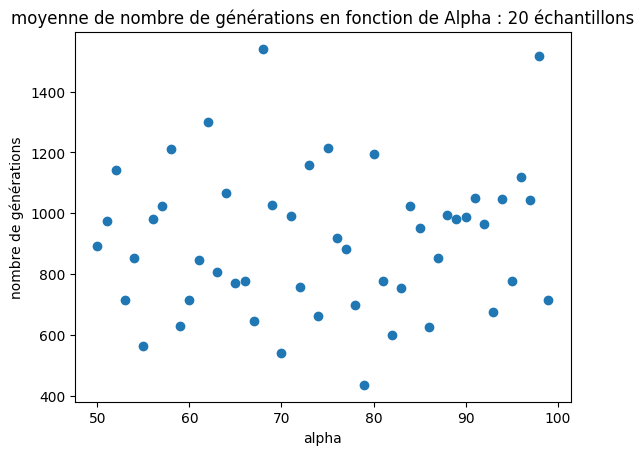

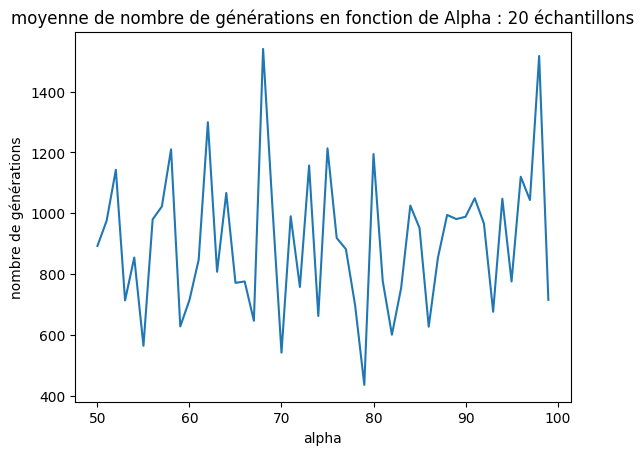

In [47]:
plt.scatter(alphas, real_output)
plt.xlabel("alpha")
plt.ylabel("nombre de générations")
plt.title("moyenne de nombre de générations en fonction de Alpha : 20 échantillons")
plt.show()

plt.plot(alphas, real_output)
plt.xlabel("alpha")
plt.ylabel("nombre de générations")
plt.title("moyenne de nombre de générations en fonction de Alpha : 20 échantillons")
plt.show()